# Dados de passagens aéreas do governo

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importando arquivo

df = pd.read_excel('C:/Users/1831133118/Documents/FSCD_II/201710_EmissaoPassagens_SCDP.xlsx', skiprows=3, skipfooter=3)

In [3]:
df.head(1)

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia,Aérea,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
0,3,Fundação Instituto Brasileiro de Geografia e E...,3,Fundação Instituto Brasileiro de Geografia e E...,028012/17,JGZQXC,2017-10-03 11:33:35.808,2017-10-06 20:55:00,407.4,0.0,...,LATAM,N,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Não,0.0,0.0,0.0,Voado


In [4]:
df.tail(1)

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia,Aérea,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
50404,219924,Secretaria-Geral da Presidência da República,34889,Diretoria de Recursos Logísticos,000188/17,OEWY8V,2017-10-18 10:09:20.946,2017-10-22 09:50:00,782.9,0.0,...,GOL,W,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Andamento


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50405 entries, 0 to 50404
Data columns (total 24 columns):
Código do órgão superior                 50405 non-null int64
Nome do órgão superior                   50405 non-null object
Código do órgão solicitante da viagem    50405 non-null int64
Nome do órgão solicitante da viagem      50405 non-null object
N. PCDP                                  50405 non-null object
N. Reserva/Localizador                   50405 non-null object
Data Emissão Bilhete                     50405 non-null object
Data Embarque                            50405 non-null object
Valor Tarifa Comercial                   50405 non-null float64
Percentual Desconto Aplicado             50405 non-null float64
Valor Tarifa Governo                     50405 non-null float64
Valor Tarifa Embarque                    50405 non-null float64
Valor Bilhete                            50405 non-null float64
Companhia Aérea                          50405 non-null object
Compan

In [6]:
#removendo espaços do nome dos órgãos
df['Nome do órgão superior']=df['Nome do órgão superior'].str.replace('  ','')

In [7]:
# Situação do bilhete
pd.value_counts(df['Situação Final Bilhete'].values, sort=True)

 Voado        28257
 Andamento    19960
 Cancelado     2188
dtype: int64

In [8]:
# Quantidade de solicitações por órgão superior
pd.value_counts(df['Nome do órgão superior'].values, sort=True)

Ministério da Fazenda                                                           2949
Departamento de Polícia Federal                                                 2664
Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira          2561
Ministério da Saúde                                                             2356
Departamento de Polícia Rodoviária Federal                                      1600
Instituto Nacional do Seguro Social                                             1426
Comando do Exército                                                             1315
Ministério da Educação                                                          1170
Comando da Aeronáutica                                                          1156
Ministério da Justiça                                                           1061
Agência Nacional de Aviação Civil                                               1005
Fundação Nacional de Saúde                                       

In [9]:
# Quantidade de solicitações por órgão
pd.value_counts(df['Nome do órgão solicitante da viagem'].values, sort=True)

Diretoria de Avaliação da Educação Superior                                        1988
Gabinete                                                                           1833
Reitoria                                                                           1499
Pró-Reitoria de Pesquisa e Pós-Graduação                                           1078
Grupamento de Apoio de Brasília                                                     830
Departamento Penitenciário Nacional                                                 628
Gabinete do Ministro                                                                537
Secretaria de Inspeção do Trabalho                                                  519
Conselho Nacional de Saúde                                                          518
Diretoria de Gestão e Planejamento                                                  384
Secretaria de Previdência                                                           377
Conselho Administrativo de Recur

In [10]:
# Compaghias mais acionadas
df['Companhia Aérea'].value_counts()

GOL Linhas Aéreas Inteligentes          17568
LATAM AIRLINES BRASIL                   12301
AZUL LINHAS AÉREAS BRASILEIRA           10967
AVIANCA S.A.                             9028
MAP TRANSPORTES AEREOS LTDA - MAP         274
Gol OU Latam - Parceria com Terceiro      267
Name: Companhia Aérea, dtype: int64

In [11]:
# Companhias mais acionadas [%]
df['Companhia Aérea'].value_counts(normalize = True)

GOL Linhas Aéreas Inteligentes          0.348537
LATAM AIRLINES BRASIL                   0.244043
AZUL LINHAS AÉREAS BRASILEIRA           0.217578
AVIANCA S.A.                            0.179109
MAP TRANSPORTES AEREOS LTDA - MAP       0.005436
Gol OU Latam - Parceria com Terceiro    0.005297
Name: Companhia Aérea, dtype: float64

In [13]:
df.groupby(['Companhia Aérea'])['Valor Bilhete'].sum()

Companhia Aérea
AVIANCA S.A.                             5245246.64
AZUL LINHAS AÉREAS BRASILEIRA            8020100.45
GOL Linhas Aéreas Inteligentes          12936609.65
Gol OU Latam - Parceria com Terceiro      162520.18
LATAM AIRLINES BRASIL                    8457533.31
MAP TRANSPORTES AEREOS LTDA - MAP         202197.21
Name: Valor Bilhete, dtype: float64

In [215]:
df_gr=pd.DataFrame(df.groupby(['Companhia'])['Valor Bilhete'].sum().nlargest(10))


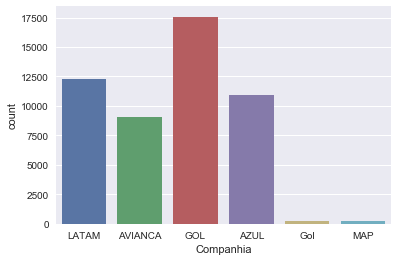

In [17]:
# solicitações por companhia
sns.set(style="darkgrid")
sns.countplot(x='Companhia', data=df)

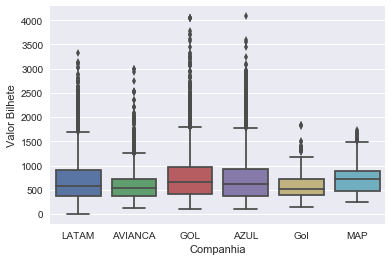

In [19]:
sns.boxplot(x='Companhia', y='Valor Bilhete', data=df)